<a href="https://colab.research.google.com/github/markrthomas/hello-world/blob/master/Copy_of_Deep_Learning_Mastering_Neural_Networks_Module_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Mastering Neural Networks - Module 4 Asignment: CNN Classification of FashionMNIST Dataset

Now that we have Convolutional layers in our deep learning toolkit, we are going tackle a new and more challenging dataset - the [FashionMNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset. This dataset is in a similar format to the MNIST dataset, however it contains images of different articles of clothing.

In this assignment, we ask that you develop a CNN classifier that implements **at least 2** convolutional layers.

A template has been provided below with some starter code and please feel free to reuse any code you have written or seen before in previous notebooks!



dataset_sizes = {'train': 45000, 'val': 15000, 'test': 10000}
CNNClassifier(
  (pipeline): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=12544, out_features=10, bias=True)
  )
)

Epoch 1/10
----------
train Loss: 0.4968 Acc: 0.8345
val   Loss: 0.5552 Acc: 0.8156
test  Loss: 0.5611 Acc: 0.8151

Epoch 2/10
----------
train Loss: 0.3603 Acc: 0.8745
val   Loss: 0.4994 Acc: 0.8314
test  Loss: 0.5029 Acc: 0.8338

Epoch 3/10
----------
train Loss: 0.3138 Acc: 0.8880
val   Loss: 0.5575 Acc: 0.8157
test  Loss: 0.5692 Acc: 0.8140

Epoch 4/10
----------
train Loss: 0.2854 Acc

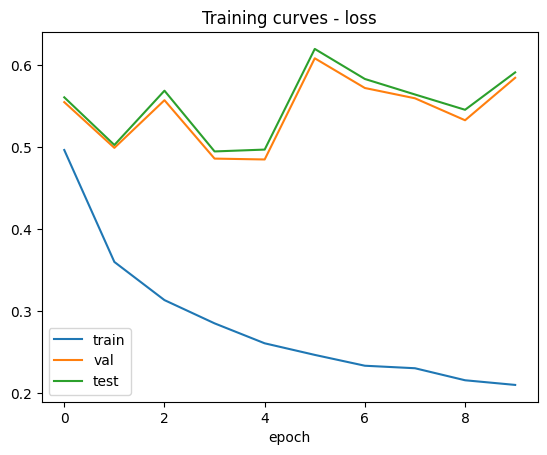

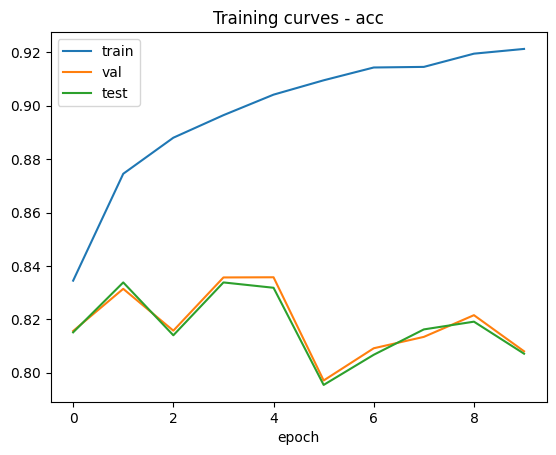

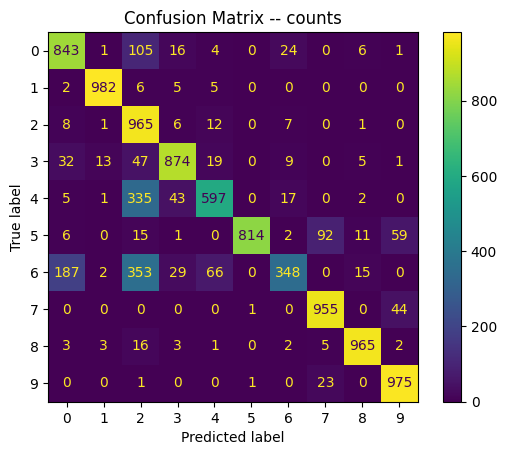

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.datasets
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from torch.nn.modules.flatten import Flatten
import time, copy
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# device config (train our model on GPU if it is available which is much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# These transforms will be performed on every datapoint - in this example we want to transform every
# datapoint to a Tensor datatype, and perform normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# Notice how FashionMNIST is also built into PyTorch!
fashion_mnist_train = torchvision.datasets.FashionMNIST('', train=True, transform =transform, download=True)

# We will split out train dataset into train and validation!
fashion_mnist_train, fashion_mnist_val = torch.utils.data.random_split(fashion_mnist_train, [int(np.floor(len(fashion_mnist_train)*0.75)), int(np.ceil(len(fashion_mnist_train)*0.25))])
fashion_mnist_test = torchvision.datasets.FashionMNIST('', train=False, transform = transform, download=True)

# We will create DataLoaders just like before with a batch size of 100
batch_size = 100
dataloaders = {'train': DataLoader(fashion_mnist_train, batch_size=batch_size),
               'val': DataLoader(fashion_mnist_val, batch_size=batch_size),
               'test': DataLoader(fashion_mnist_test, shuffle=True, batch_size=batch_size)}

dataset_sizes = {'train': len(fashion_mnist_train),
                 'val': len(fashion_mnist_val),
                 'test': len(fashion_mnist_test)}
print(f'dataset_sizes = {dataset_sizes}')


## Visualization
'''
* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot
'''

# plot a digit ground truth and autoencoding
def view_fashionmnist(label, count = 1):
    fig = plt.figure()
    idx = 1
    for inputs, labels in dataloaders["test"]:
        for i, input in enumerate(inputs):
            # we only want to view a certain class
            if (labels[i] != label):
                continue
            # plot the ground truth
            ax = fig.add_subplot(1, count, idx)
            input = input.cpu().detach().numpy().reshape((28,28))
            ax.imshow(input, cmap='gray')
            idx += 1
            if idx > count:
                break
        if idx > count:
            break

# View 6 bags
#view_fashionmnist(8, 6)
# View 1 sneaker
#view_fashionmnist(7, 1)

## Your Turn
# Hint! Create a CNNClassifier class that implements a forward function
# TODO: replace this with the model with the extra layer!!

'''
Please submit ipynb code not pdfs! Your architectures a bit odd, maxpools definitely don't belong after flattening!
You also use them too liberally, you typically have 2-3 conv layers then a max pool.
You also need to regularise the gradient better this is done via batchnorms after the convolutional and max pool layers.
No need for softmax as its included in the CrossEntropy loss. You also have 2 linear layers consecutively
 (which isn't a FC layer, you require a non-linear layer between to get the benefit of compute)

'''
# Model:

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # Split the Encoder and Decoder

        self.pipeline = nn.Sequential(
            nn.Dropout(0.20),
            # Extra pooling didn't help
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
           # nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1), # Still too wide, didn't help really ..
           # nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.BatchNorm2d(64), # Batch Norm did help smooth things out ..
           # nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1), # Too wide, didn't help..
           # Extra Conv layers didn't help.. & slowed things way down
            nn.Flatten(),
            nn.Linear(12544, 10)
        )

    def forward(self, x):
        return self.pipeline(x)

#TODO fix and adjust
learning_rate = 0.001 # was 0.001
num_epochs = 10 # was 10

model = CNNClassifier().to(device)
print(model)


#TODO: replace this with the last model trainer in example!
# Hint! Try reusing one of the training functions we have previously written

def train_classification_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) # keep the best weights stored separately
    best_acc = 0.0
    best_epoch = 0

    # Each epoch has a training, validation, and test phase
    phases = ['train', 'val', 'test']

    # Keep track of how loss and accuracy evolves during training
    training_curves = {}
    for phase in phases:
        training_curves[phase+'_loss'] = []
        training_curves[phase+'_acc'] = []

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in phases:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                # No need to flatten the inputs!
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, predictions = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + update weights only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(predictions == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            training_curves[phase+'_loss'].append(epoch_loss)
            training_curves[phase+'_acc'].append(epoch_acc)

            print(f'{phase:5} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model if it's the best accuracy (bas
            if phase == 'val' and epoch_acc > best_acc:
              best_epoch = epoch
              best_acc = epoch_acc
              best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f} at epoch {best_epoch}')

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, training_curves



# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
model, training_curves = train_classification_model(model, dataloaders, dataset_sizes,
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


### Visualizing Training Curves and Results
# Utility functions for plotting your results!
def plot_training_curves(training_curves,
                         phases=['train', 'val', 'test'],
                         metrics=['loss','acc']):
    epochs = list(range(len(training_curves['train_loss'])))
    for metric in metrics:
        plt.figure()
        plt.title(f'Training curves - {metric}')
        for phase in phases:
            key = phase+'_'+metric
            if key in training_curves:
                if metric == 'acc':
                    plt.plot(epochs, [item.detach().cpu() for item in training_curves[key]])
                else:
                    plt.plot(epochs, training_curves[key])
        plt.xlabel('epoch')
        plt.legend(labels=phases)


def classify_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_labels = torch.tensor([]).to(device)
    all_scores = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = torch.softmax(model(inputs),dim=1)
        _, preds = torch.max(outputs, 1)
        # scores = outputs[:,1]
        scores = outputs[::]
        all_labels = torch.cat((all_labels, labels), 0)
        all_scores = torch.cat((all_scores, scores), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_labels.detach().cpu(), all_scores.detach().cpu()

def plot_cm(model, device, dataloaders, phase='test'):
    class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    preds, labels, scores = classify_predictions(model, device, dataloaders[phase])

    cm = metrics.confusion_matrix(labels, preds)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- counts')


plot_training_curves(training_curves, phases=['train', 'val', 'test'])

res = plot_cm(model, device, dataloaders, phase='test')


## Conclusions

Now that we have implemented our network we want to examine the results.

What class of object is most often misclassified? What class is it incorrectly classified as most often?

Additionally, try re-training your network with dropout included. Does this help the performance or is there a noticeable change in the ability of the model to generalize? Is the most commonly misclassified object still the same as with no dropout?